 > ## Importing libraries and data¶


In [1]:
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Linear Regression
from scipy.stats import linregress

#Train_test_split
from sklearn.model_selection import train_test_split

#cross_val_score
from sklearn.model_selection import cross_val_score

#scaling
from sklearn.preprocessing import StandardScaler



from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt
#models

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
#score
from sklearn.metrics import r2_score

#Importing data
df = pd.read_csv("insurance.csv")


> ## Analyze by describing the data

In [2]:
# take a look at the data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# statistical measuers
display(df.describe())

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
# Getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Findings:

There are four numerical variables:
    - Continuous:
    - Age
    - BMI
    - Charges
    - Discrete:
    - children  
There are three categorical variables:
    - Sex
    - Smoker
    - Region

##### is there is a relationship between the features and each other?

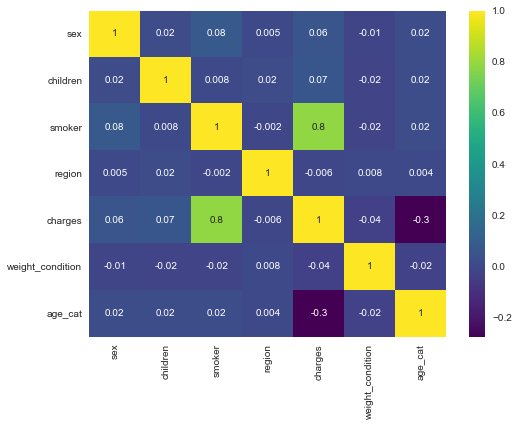

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=True);

Hmmm... not much

> ## It's time to prepare our data 🙌🏻:

### checking the missing data:

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing data, cool!

### Does it indicate that the data is really stable? check the outliers...

 first we will need some statistical information...

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\zeado\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

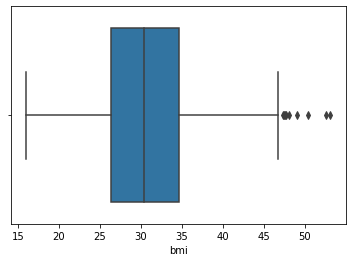

In [8]:
# Bmi
sns.boxplot(df['bmi'])

#### i got them 😈

In [9]:
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)
Q1, Q3

(26.29625, 34.69375)

In [10]:
IQR = Q3 - Q1
IQR

8.3975

In [11]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(13.7, 47.290000000000006)

#### Let's find out which this data is..

In [12]:
df[df['bmi'] > upper_limit]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


only 9 records! we can get red of them safely 

In [13]:
df_new = df.drop(df.index[[116,401,286,543,847,860,1047,1088,1317]])

##### The rest of the features are stable, thank God .

> # DEA 

### take a look at the features and its effect in the target "charges" ...


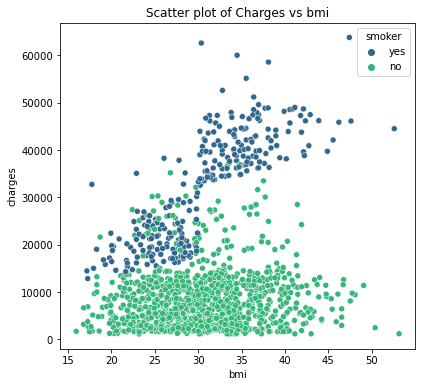

In [15]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

### insights:
- Most of the people who smoke are obese people
- Even though a person is not obese but he/she smokes, his/her charges tends to be higher.


In [16]:
df["bmi"].value_counts()   # Body mass index, providing an understanding of body, ideally 18.5 to 24.9

32.300    13
28.310     9
30.800     8
34.100     8
28.880     8
          ..
44.745     1
26.070     1
27.300     1
37.715     1
29.200     1
Name: bmi, Length: 548, dtype: int64

#### I see that It will be clearer if we classify people into categories according to their "bmi" 💡

In [17]:
df['weight_condition'] = np.nan
data = [df]

for col in data:
    col.loc[col.bmi < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col.bmi >= 18.5) & (col.bmi < 24.986), "weight_condition"] = "Normal"
    col.loc[(col.bmi >= 25) & (col.bmi < 29.926), "weight_condition"] = "Overweight"
    col.loc[col.bmi >= 30, "weight_condition"] = "Obese"


In [18]:
df.drop("bmi", axis = 1, inplace = True)
display(df.head())

,age,sex,children,smoker,region,charges,weight_condition
0,19,female,0,yes,southwest,16884.92400,Overweight
1,18,male,1,no,southeast,1725.55230,Obese
2,28,male,3,no,southeast,4449.46200,Obese
3,33,male,0,no,northwest,21984.47061,Normal
4,32,male,0,no,northwest,3866.85520,Overweight


### age VS charges

Text(0.5, 1.0, 'Scatter plot of Charges vs age')

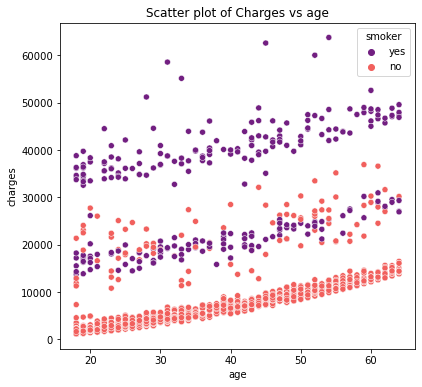

In [19]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')


#### Insights
- Charges increases as the age of the person increases
- Smokers and obese people have the highest charges regardless of their age.


#### i'll do the same thing with "age" so that the data to be follow the same flo 🤙🏻

In [20]:
df['age_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'
    

In [21]:
df.drop("age", axis = 1, inplace = True)
df.head()

,sex,children,smoker,region,charges,weight_condition,age_cat
0,female,0,yes,southwest,16884.92400,Overweight,Young Adult
1,male,1,no,southeast,1725.55230,Obese,Young Adult
2,male,3,no,southeast,4449.46200,Obese,Young Adult
3,male,0,no,northwest,21984.47061,Normal,Young Adult
4,male,0,no,northwest,3866.85520,Overweight,Young Adult


### Relation between sex and charges: 

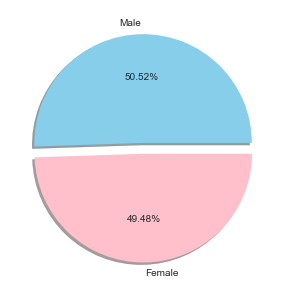

In [22]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=df["sex"].value_counts(), 
        colors=["skyblue","pink"], 
        labels=["Male","Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

##### Almost the same proportion...

C:\Users\zeado\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zeado\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


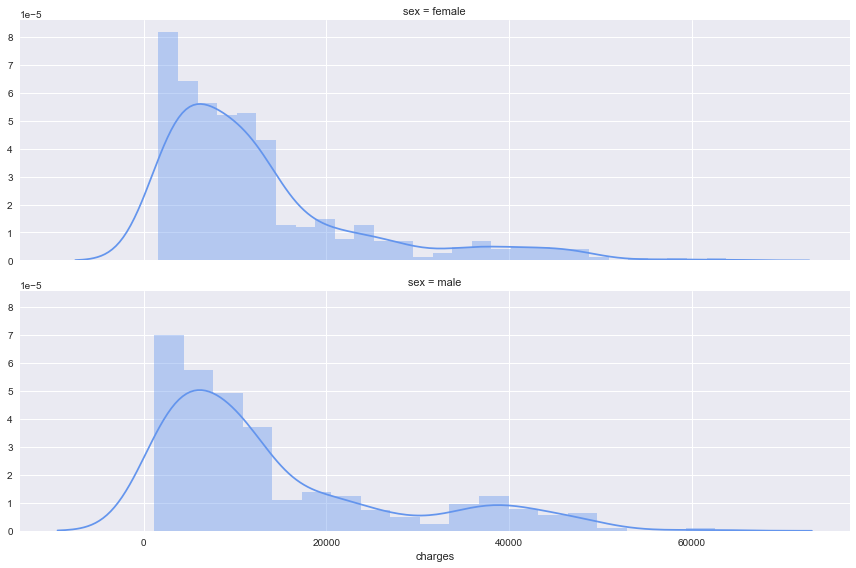

In [23]:
#Cheking the charges distributions for males and females
x1 = sns.FacetGrid(df, row='sex', height=4, aspect=3)
x1 = x1.map(sns.distplot, 'charges', color='cornflowerblue')
plt.show()


##### As we can see the two distributions are almost the same for both women/men, so we can affirm that there is no influence on the medical charges when it comes to the sex variable.

###  let's see how many children our patients have.



C:\Users\zeado\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


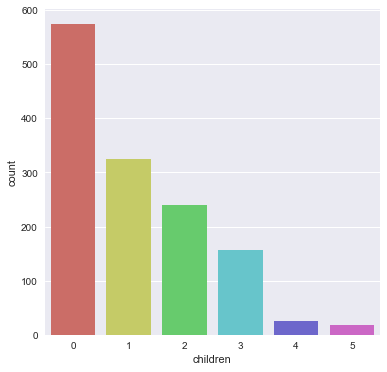

In [24]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(df["children"], palette="hls");

##### Most patients do not have children

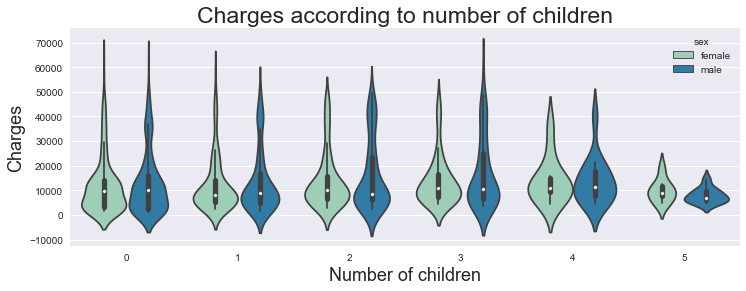

In [25]:
#Creating a violinplot for each category
plt.figure(figsize=(12,4))
sns.violinplot(x='children', y='charges', data=df, hue='sex', palette='YlGnBu')
plt.title('Charges according to number of children', size='23')
plt.ylabel('Charges',size=18)
plt.xlabel('Number of children',size=18)
plt.show()

As we can see, almost all categories have the same range and mean of costs also the distributions are very similar, except for the people who have 5 children. This might be because of the small size of the sample of this kind of people!

### Relation between smoking and charges: 

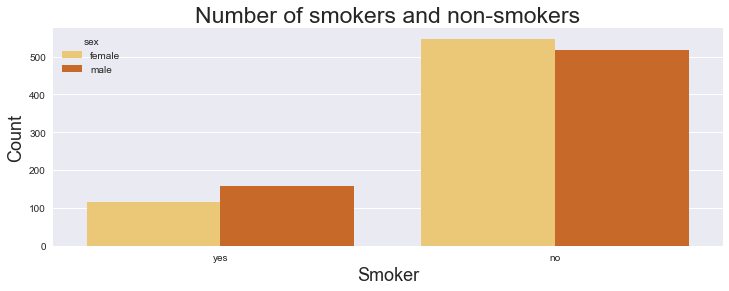

In [26]:
#Countplot to compare the number of smokers and non-smokers
plt.figure(figsize=(12,4))
sns.countplot(x='smoker', data=df, hue='sex', palette='YlOrBr') 
plt.title('Number of smokers and non-smokers', size='23')
plt.ylabel('Count',size=18)
plt.xlabel('Smoker',size=18)
plt.show()

#### notice :
- 0 for females
- 1 for males
------------------
- smokers = 1: yes
- smokers = 0: no

 Males tend to smoke more than females.

##### As we can see charges for smokers are much higher than charges for non-smokers. Sex doesn't have any effect on charges when you are a smoker

###  Relation between regions and charges: 

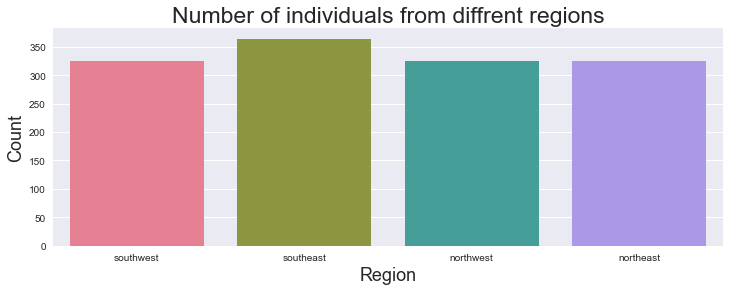

In [27]:
#Countplot to compare the number of individuals from diffrent regions
plt.figure(figsize=(12,4))
sns.countplot(x='region', data=df, palette='husl') 
plt.title('Number of individuals from diffrent regions', size='23')
plt.ylabel('Count',size=18)
plt.xlabel('Region',size=18)
plt.show()

##### Almsot all the regions have equal number of individuals.

## Conclusion:
##### We have found out that region and gender does not bring significant difference on charges among its groups. Age, BMI,      number of children and smoking are the once that drives the charges. 
As:
-  age has an impact on the charges, when a person is older the health costs are larger.
-  if you are a smoker you must expect some huge medical charges compared to non-smokers. Especially for people who have high BMI values (>35) it will result very serious health care charges.
- no matter where you live, this won't have any impact on your medical insurance bills.
- the number of children doesn't affect the medical costs billed by health insurance.
-  it doesn't matter if you are a men or a women your health bills won't change.

### before go  to modeling, we have to prepare the data types of the features:

> # label encoding:


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
les = {}
for col in ['sex','smoker','region', 'weight_condition', 'age_cat']:
    les[col] = LabelEncoder()
    df[col]  = les[col].fit_transform(df[col])

In [29]:
df.head()

,sex,children,smoker,region,charges,weight_condition,age_cat
0,0,0,1,3,16884.92400,2,2
1,1,1,0,2,1725.55230,1,2
2,1,3,0,2,4449.46200,1,2
3,1,0,0,1,21984.47061,0,2
4,1,0,0,1,3866.85520,2,2


In [31]:
df =df.drop(columns=['sex','region'])
df.head()

,children,smoker,charges,weight_condition,age_cat
0,0,1,16884.92400,2,2
1,1,0,1725.55230,1,2
2,3,0,4449.46200,1,2
3,0,0,21984.47061,0,2
4,0,0,3866.85520,2,2


##### Great ♥️

### We are almost ready to finally prepare the models! so let's split the data to work on it...

> # Modeling :
There are good models, But we looking for the Best!

> # Splitting the data into Training data & Testing Data:

In [32]:
x= df.drop('charges',axis=1).values
y =df.charges.values
x_tr,x_tst,y_tr,y_tst = train_test_split(x,y,test_size=.2,random_state=25)

- Feature Scaling

In [33]:
sc = StandardScaler()
x_tr = sc.fit_transform(x_tr)
x_tst = sc.transform(x_tst)

- Experience 8 algorithms


In [34]:
lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=10)
dt  = DecisionTreeRegressor(max_depth = 3)
rf  = RandomForestRegressor(max_depth = 3, n_estimators=500)
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
xgb = XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.2)
cb  = CatBoostRegressor(learning_rate =.01, max_depth =5, verbose = 0)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb),('CatBoostRegressor', cb)]


Linear Regression : 70 %
K Nearest Neighbours : 90 %
Decision Tree : 90 %
Random Forest : 90 %
AdaBoost : 90 %
Gradient Boosting Regressor : 90 %
XGBRegressor : 90 %
CatBoostRegressor : 90 %


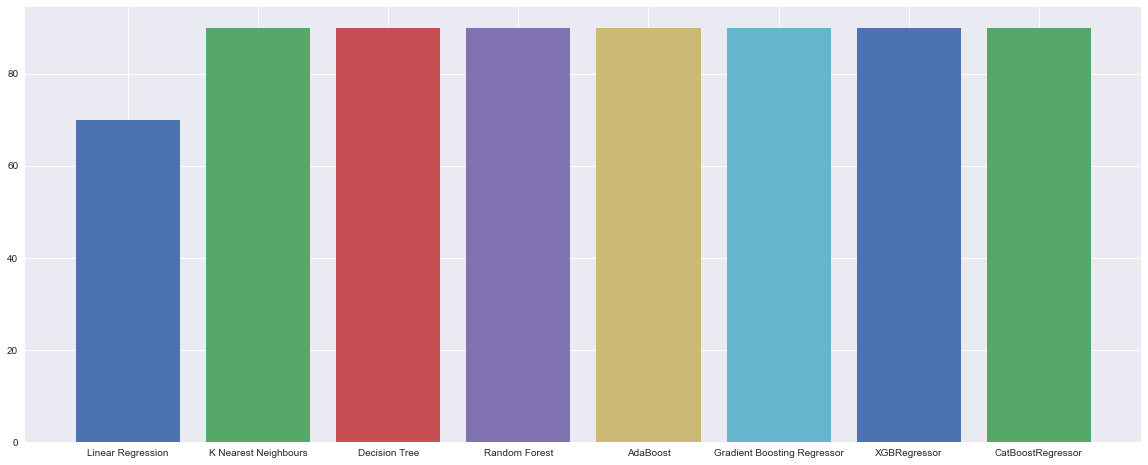

In [35]:

for regressor_name, regressor in regressors:

    regressor.fit(x_tr, y_tr)    
  
    y_pred = regressor.predict(x_tst)
    accuracy = round(r2_score(y_tst,y_pred),1)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

### Best Models
- Random Forest : 90 %
- Gradient Boosting Regressor : 90 %
- CatBoostRegressor : 90 %
- XGBRegressor : 90 %
- AdaBoost : 90 %
- Decision Tree : 90 %

 ### R square (r2) Score & Root Mean Squared Error(RMSE)
 

- KNN

In [50]:
y_predict = knn.predict(x_tst)
knn_r2_score = r2_score(y_tst, y_predict)
print('R square Score = ', round(knn_r2_score, 3))

mse = mean_squared_error(y_tst, y_predict)
rmse = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse, 3))

R square Score =  0.865
Root Mean Squared Error =  4362.29


- Random Forest

In [36]:
y_predict = rf.predict(x_tst)
rf_r2_score = r2_score(y_tst, y_predict)
print('R square Score = ', round(rf_r2_score, 3))

mse = mean_squared_error(y_tst, y_predict)
rmse = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse, 3))

R square Score =  0.856
Root Mean Squared Error =  4514.558


- Decision Tree

In [37]:
y_predict = dt.predict(x_tst)
dt_r2_score = r2_score(y_tst, y_predict)
print('R square Score = ', round(dt_r2_score, 3))

mse = mean_squared_error(y_tst, y_predict)
rmse = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse, 3))

R square Score =  0.854
Root Mean Squared Error =  4539.533


- AdaBoost

In [38]:
y_predict = ada.predict(x_tst)
ada_r2_score = r2_score(y_tst, y_predict)
print('R square Score = ', round(ada_r2_score, 3))

mse = mean_squared_error(y_tst, y_predict)
rmse = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse, 3))

R square Score =  0.852
Root Mean Squared Error =  4571.896


- Gradient Boosting Regressor

In [45]:
y_predict = gbr.predict(x_tst)
gbr_r2_score = r2_score(y_tst, y_predict)
print('R square Score = ', round(gbr_r2_score, 5))

mse = mean_squared_error(y_tst, y_predict)
rmse = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse,5))

R square Score =  0.87451
Root Mean Squared Error =  4209.24584


- XGBRegressor
- note : the best algorithm

In [46]:
y_predict = xgb.predict(x_tst)
xgb_r2_score = r2_score(y_tst, y_predict)
print('R square Score = ', round(xgb_r2_score, 5))

mse = mean_squared_error(y_tst, y_predict)
rmse = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse, 5))

R square Score =  0.87804
Root Mean Squared Error =  4149.5777


- CatBoostRegressor.


In [47]:
y_predict = cb.predict(x_tst)
cb_r2_score = r2_score(y_tst, y_predict)
print('R square Score = ', round(cb_r2_score, 5))

mse = mean_squared_error(y_tst, y_predict)
rmse = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse, 5))

R square Score =  0.87774
Root Mean Squared Error =  4154.72088


### Cross Validation
It is a resampling procedure wich is used to evaluate the machine learning models on limited data samples. Its goal is to predict new data that is that is not tested before. 

In [49]:
score = cross_val_score(xgb, x, y, cv=5)
print(score)

[0.85890086 0.79149981 0.85040421 0.83031141 0.86551417]


### Model Accuracy Comparison

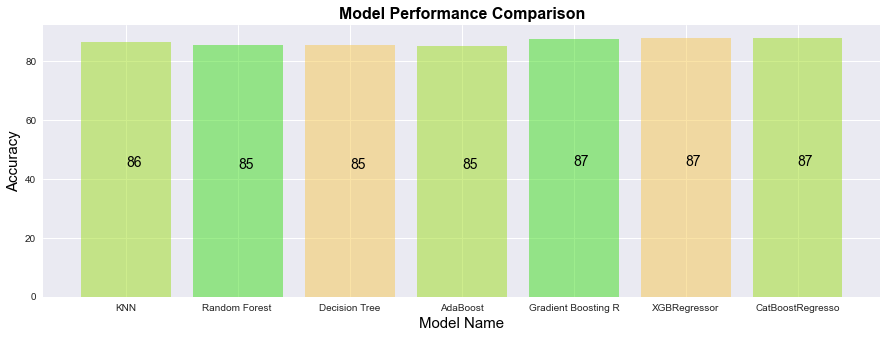

In [51]:


r2_scores = [knn_r2_score*100,rf_r2_score*100, dt_r2_score*100, ada_r2_score*100,gbr_r2_score*100,xgb_r2_score*100,cb_r2_score*100]
model_names = ["KNN",'Random Forest ', 'Decision Tree', 'AdaBoost',"Gradient Boosting R","XGBRegressor","CatBoostRegresso"]

total_bar = np.arange(len(model_names))
color = ['#9edd1d', '#3edd1d', '#f7c851']

fig, ax = plt.subplots(figsize=(15, 5))
bar = plt.bar(model_names, r2_scores, alpha=.50, color=color)
plt.xticks(total_bar, model_names)
plt.ylabel('Accuracy',fontsize=15, color='black')
plt.xlabel('Model Name',fontsize=15, color='black')
plt.title('Model Performance Comparison', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()